In [751]:
#!pip install rembg
#!pip install onnxruntime

In [752]:
import cv2
from matplotlib import pyplot as plt
image_file = "1.jpg"


In [753]:
from rembg import remove
from PIL import Image

# Chemin de l'image d'entrée
#input_path = "manuscrit_cnam.jpg"

# Chemin de l'image de sortie (sans arrière-plan)
output_path = "output_image.png"

# Charger l'image
input_image = Image.open(image_file)

# Supprimer l'arrière-plan
output_image = remove(input_image)

# Sauvegarder l'image résultante
output_image.save(output_path)

# Afficher l'image résultante avec PIL
output_image.show()

In [754]:
img = cv2.imread(output_path)

In [755]:
#https://stackoverflow.com/questions/28816046/
import cv2
from matplotlib import pyplot as plt

def display(im_path, scale_percent=50):
    # Charger l'image avec OpenCV
    img = cv2.imread(im_path)

    # Redimensionner l'image
    new_width = int(img.shape[1] * scale_percent / 100)
    new_height = int(img.shape[0] * scale_percent / 100)
    resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Convertir l'image de BGR (OpenCV) à RGB (Matplotlib)
    resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Calculer la taille de la figure en pouces
    dpi = 80
    figsize = new_width / float(dpi), new_height / float(dpi)

    # Créer une figure de la bonne taille avec un axe qui prend toute la figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Masquer les axes, les ticks, etc.
    ax.axis('off')

    # Afficher l'image redimensionnée
    ax.imshow(resized_img_rgb, cmap='gray')

    # Afficher la figure
    plt.show()

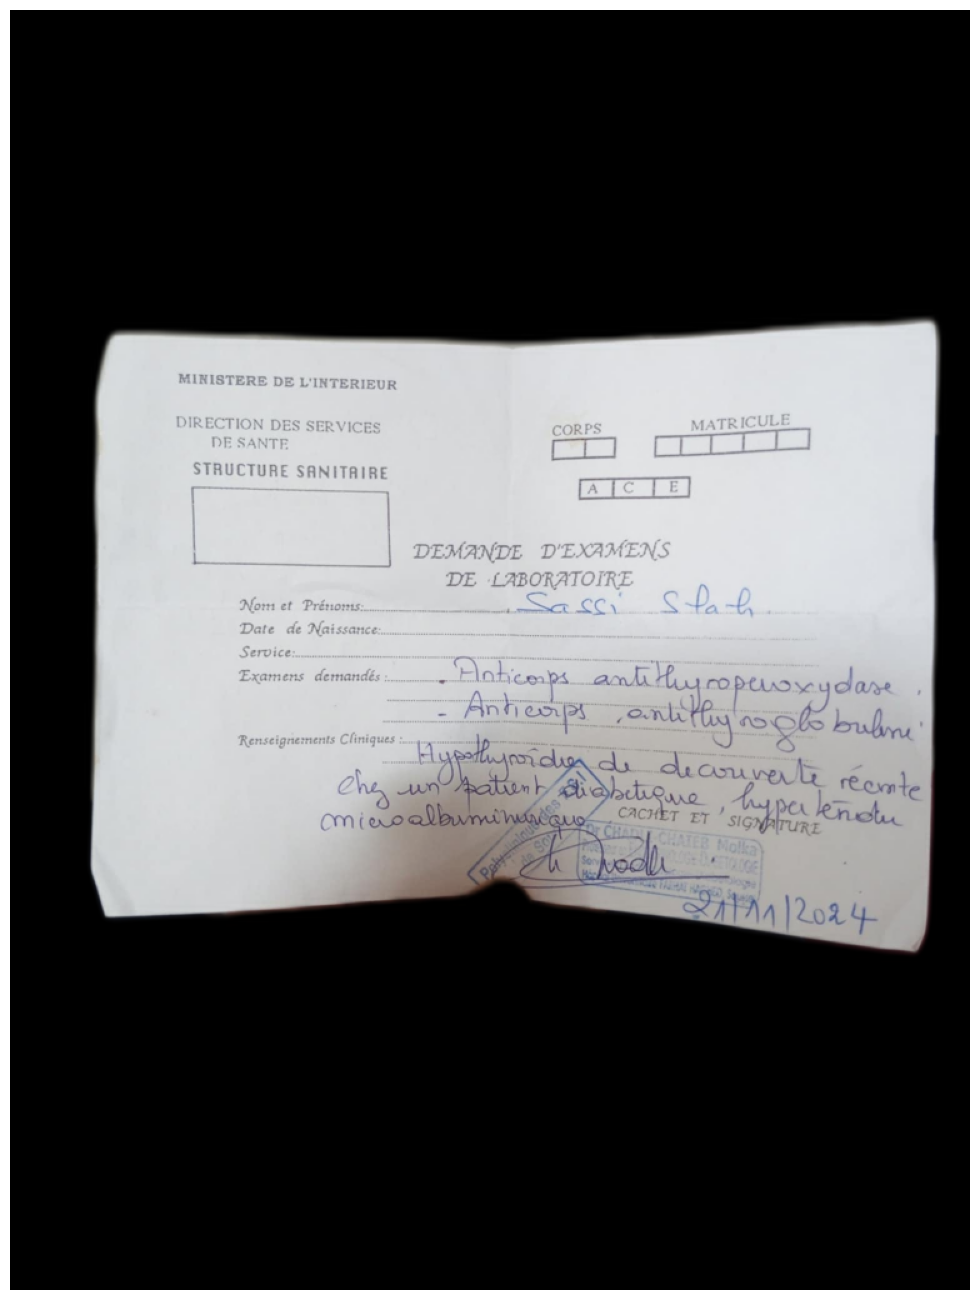

In [756]:
display(output_path)

**Problème :** Les documents manuscrits peuvent avoir un fond sombre ou des taches, ce qui rend le texte difficile à lire ou à extraire.

**Solution :** L'inversion des couleurs peut rendre le texte plus visible en inversant les niveaux de luminosité. Par exemple, si le texte est sombre sur un fond clair, il deviendra clair sur un fond sombre après inversion, ce qui peut améliorer la détection du texte.

In [757]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("inverted.jpg", inverted_image)

True

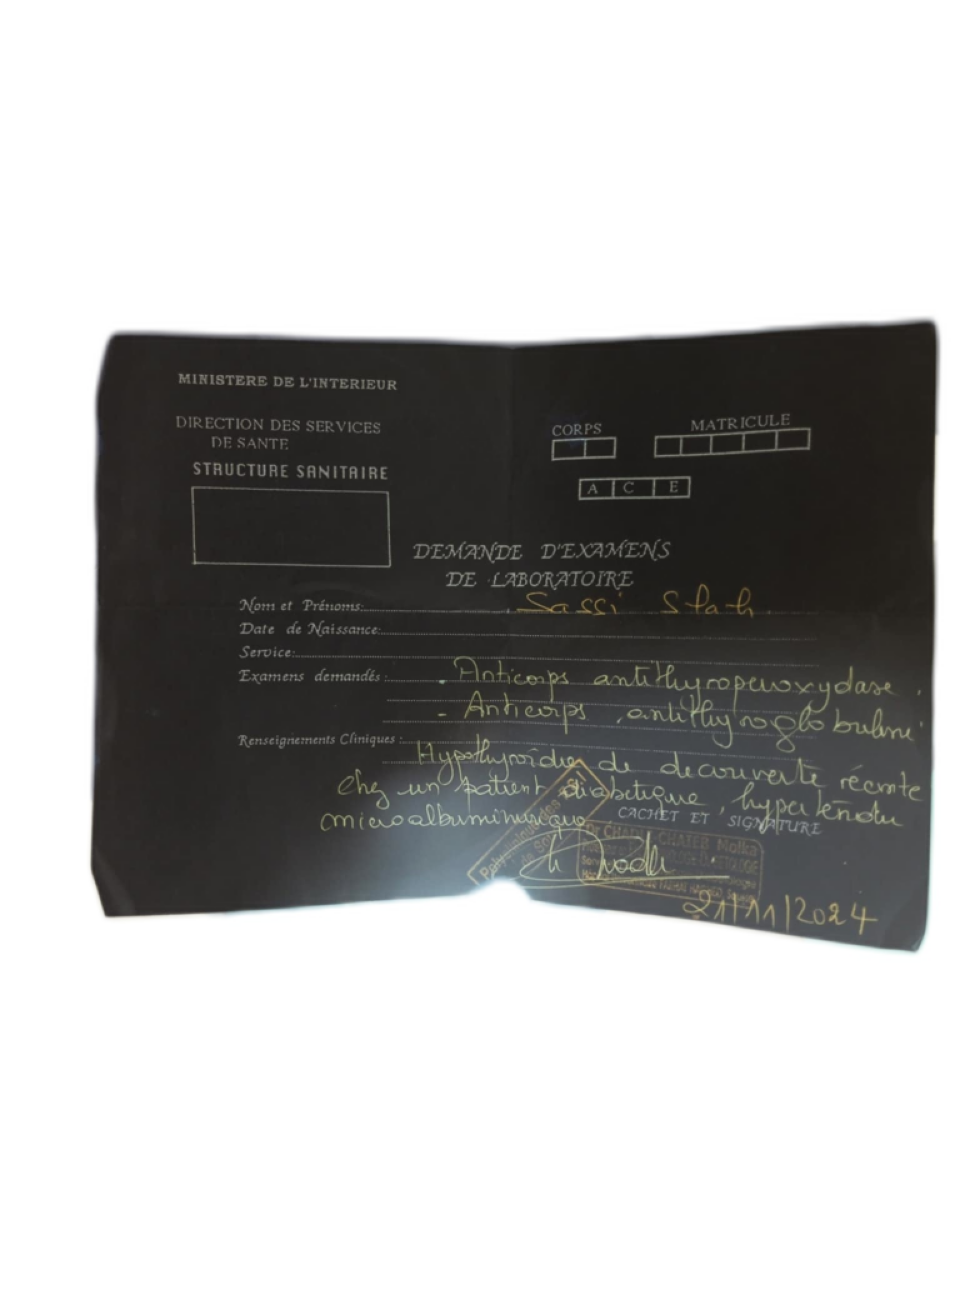

In [758]:
display("inverted.jpg")

In [759]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [760]:
gray_image = grayscale(img)
cv2.imwrite("gray.jpg", gray_image)

True

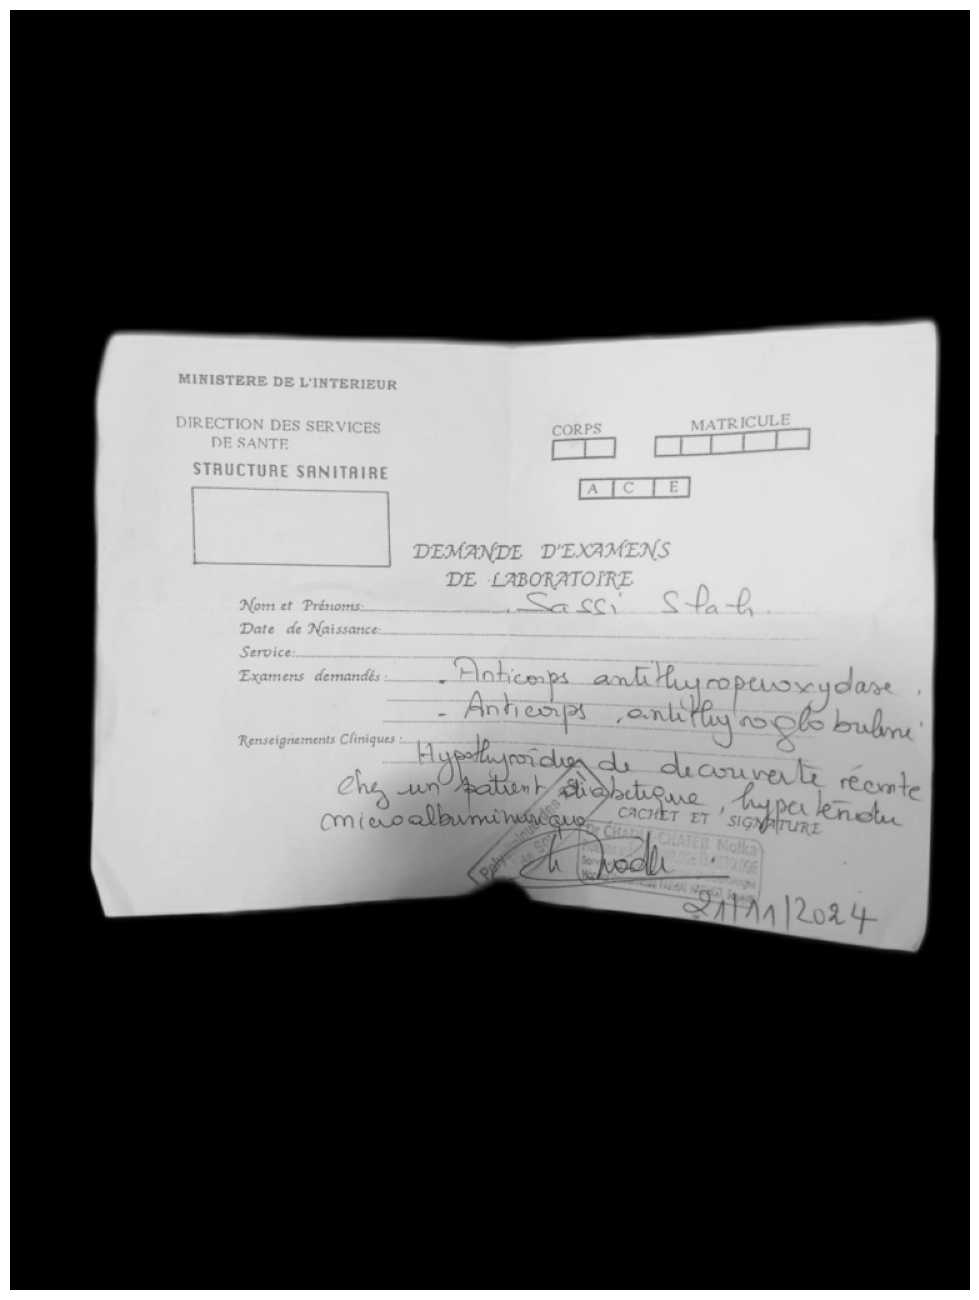

In [761]:
display("gray.jpg")

In [762]:
#https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python

#import cv2

#image = cv2.imread('output_image.png')
#image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
#bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
#out_gray=cv2.divide(image, bg, scale=255)
#out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1]

#cv2.imshow('binary', out_binary)
#cv2.imwrite('binary.png',out_binary)

#cv2.imshow('gray', out_gray)
#cv2.imwrite('gray.png',out_gray)

In [763]:
import cv2

# Charger l'image en niveaux de gris
image = cv2.imread("output_image.png", cv2.IMREAD_GRAYSCALE)

# Appliquer un flou gaussien pour réduire le bruit
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Améliorer le contraste
image_eq = cv2.equalizeHist(image_blur)

# Appliquer un seuillage adaptatif pour un meilleur rendu
im_bw = cv2.adaptiveThreshold(image_eq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 11, 6)

# Sauvegarder l'image résultante
cv2.imwrite("bw_image.jpg", im_bw)


True

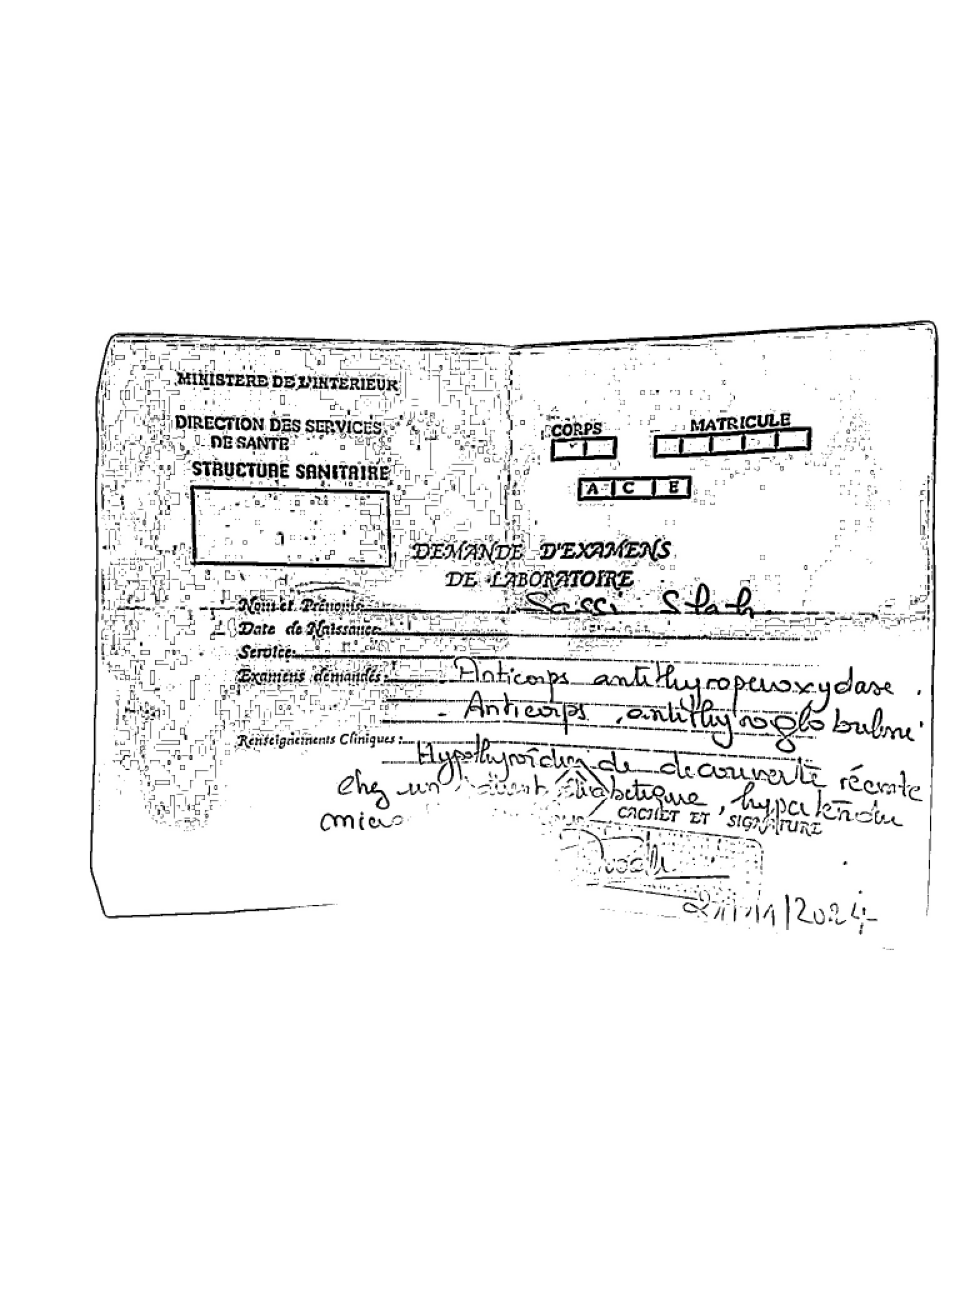

In [764]:
display("bw_image.jpg")

In [765]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [766]:
no_noise = noise_removal(im_bw)
cv2.imwrite("no_noise.jpg", no_noise)

True

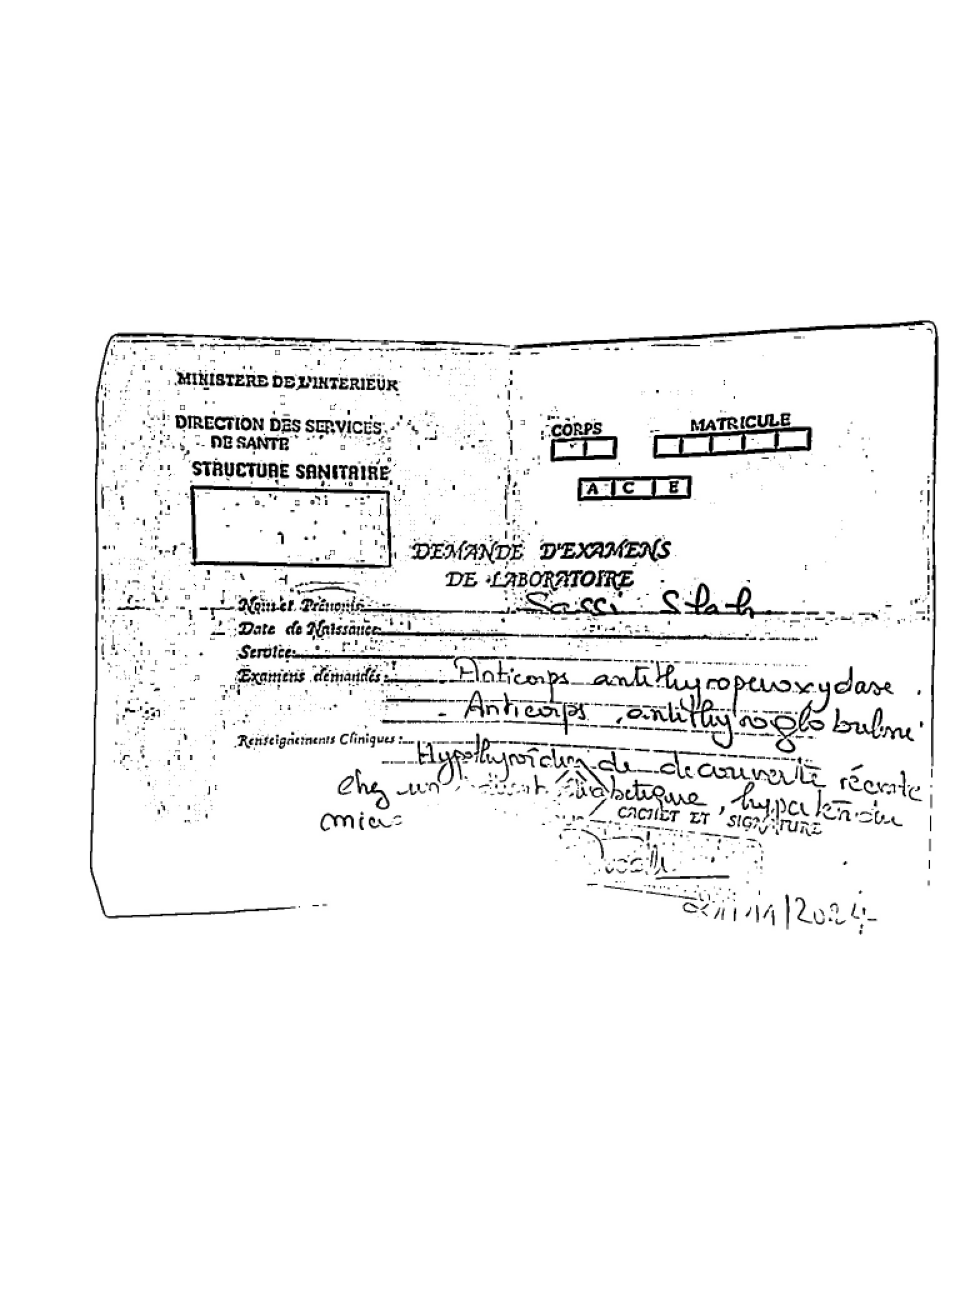

In [767]:
display("no_noise.jpg")

In [768]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [769]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_image.jpg", eroded_image)

True

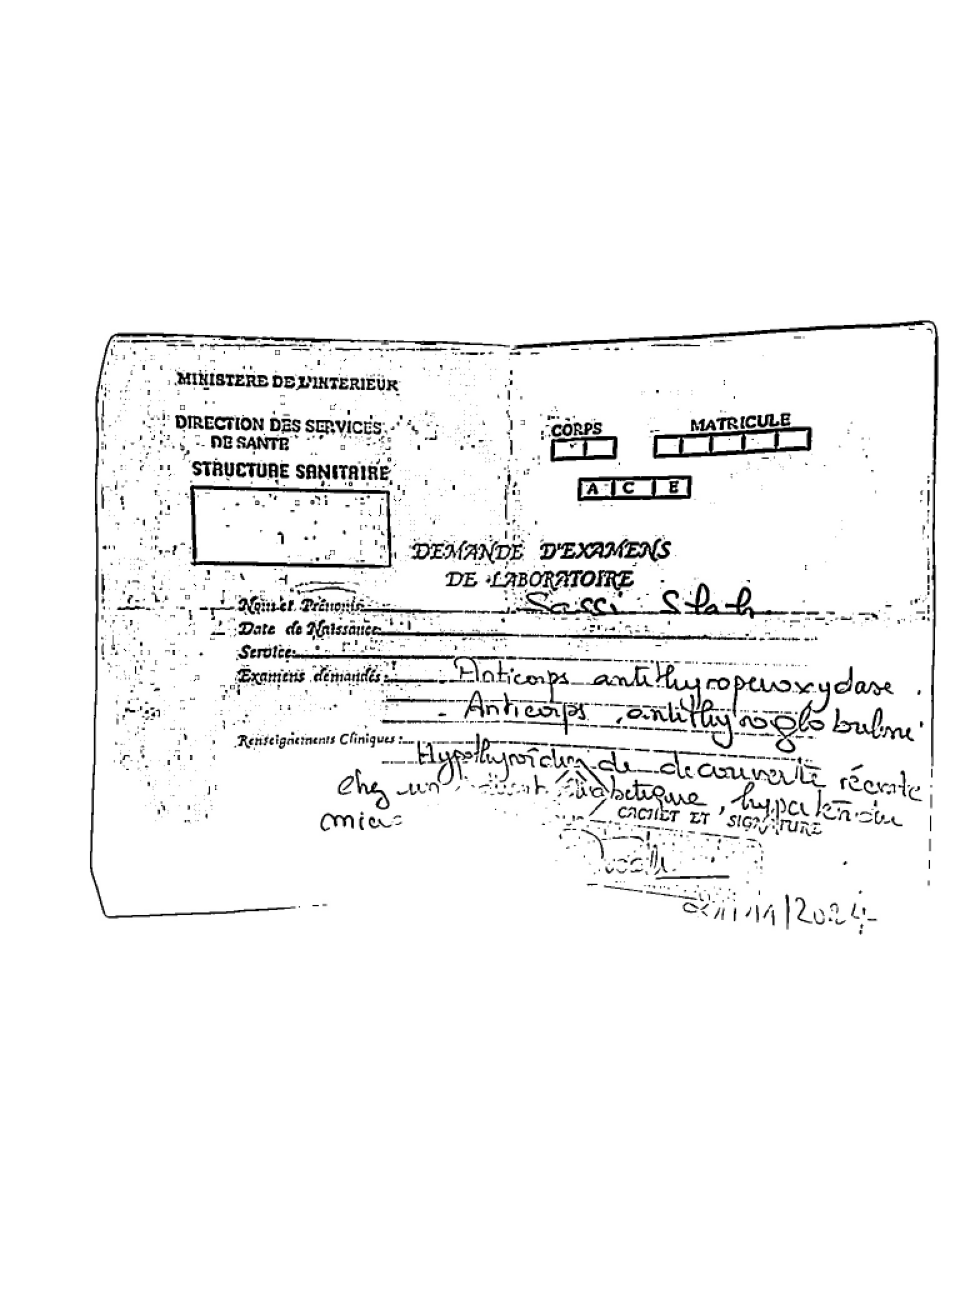

In [770]:
display("eroded_image.jpg")

In [771]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [772]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg", dilated_image)

True

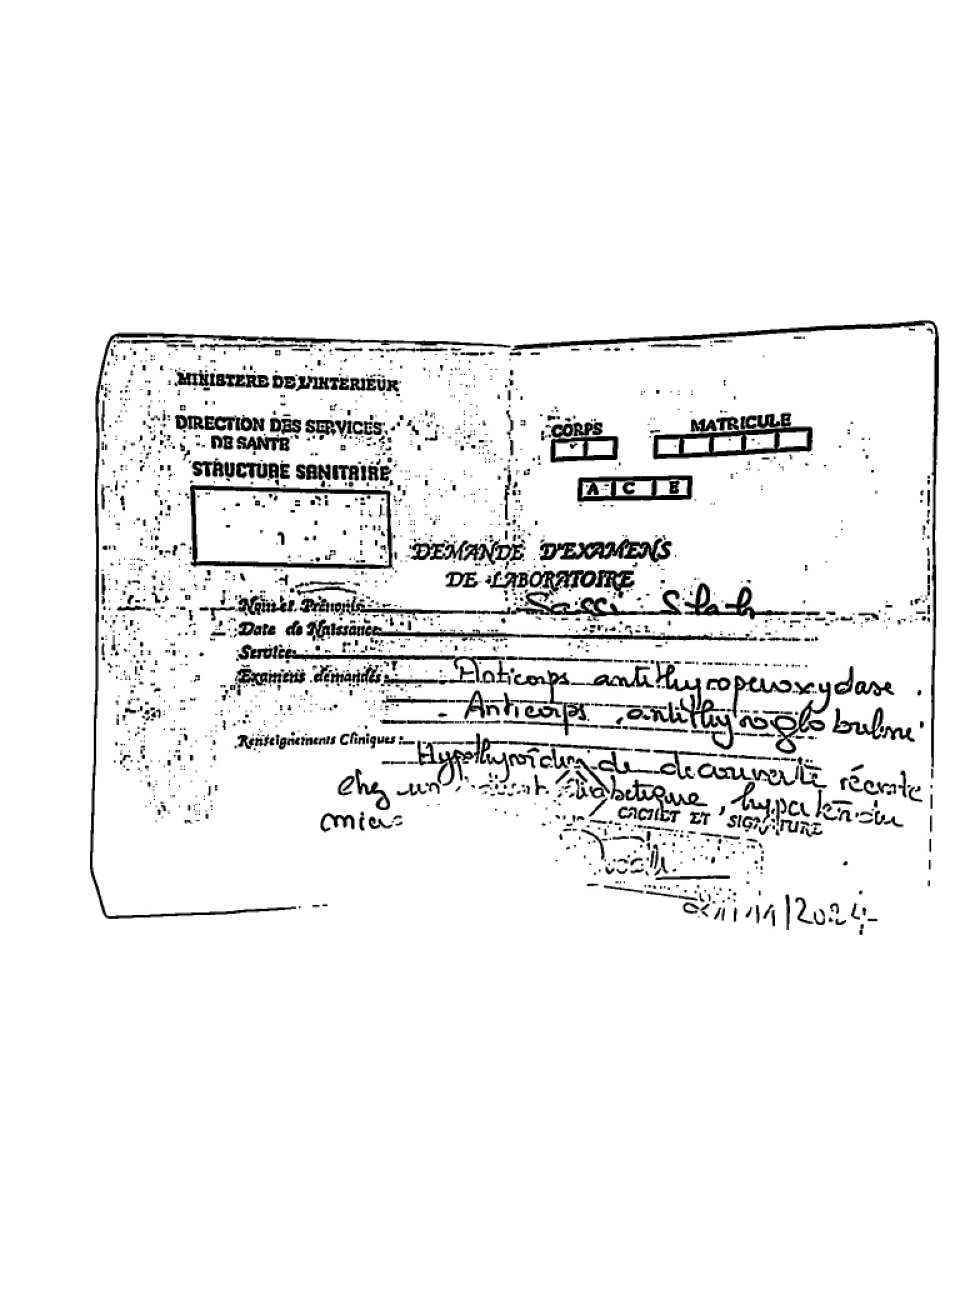

In [773]:
display("dilated_image.jpg")

**Rotation de l'image**

In [776]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [777]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [778]:
fixed = deskew(img)
cv2.imwrite("rotated_fixed.jpg", fixed)

17


True

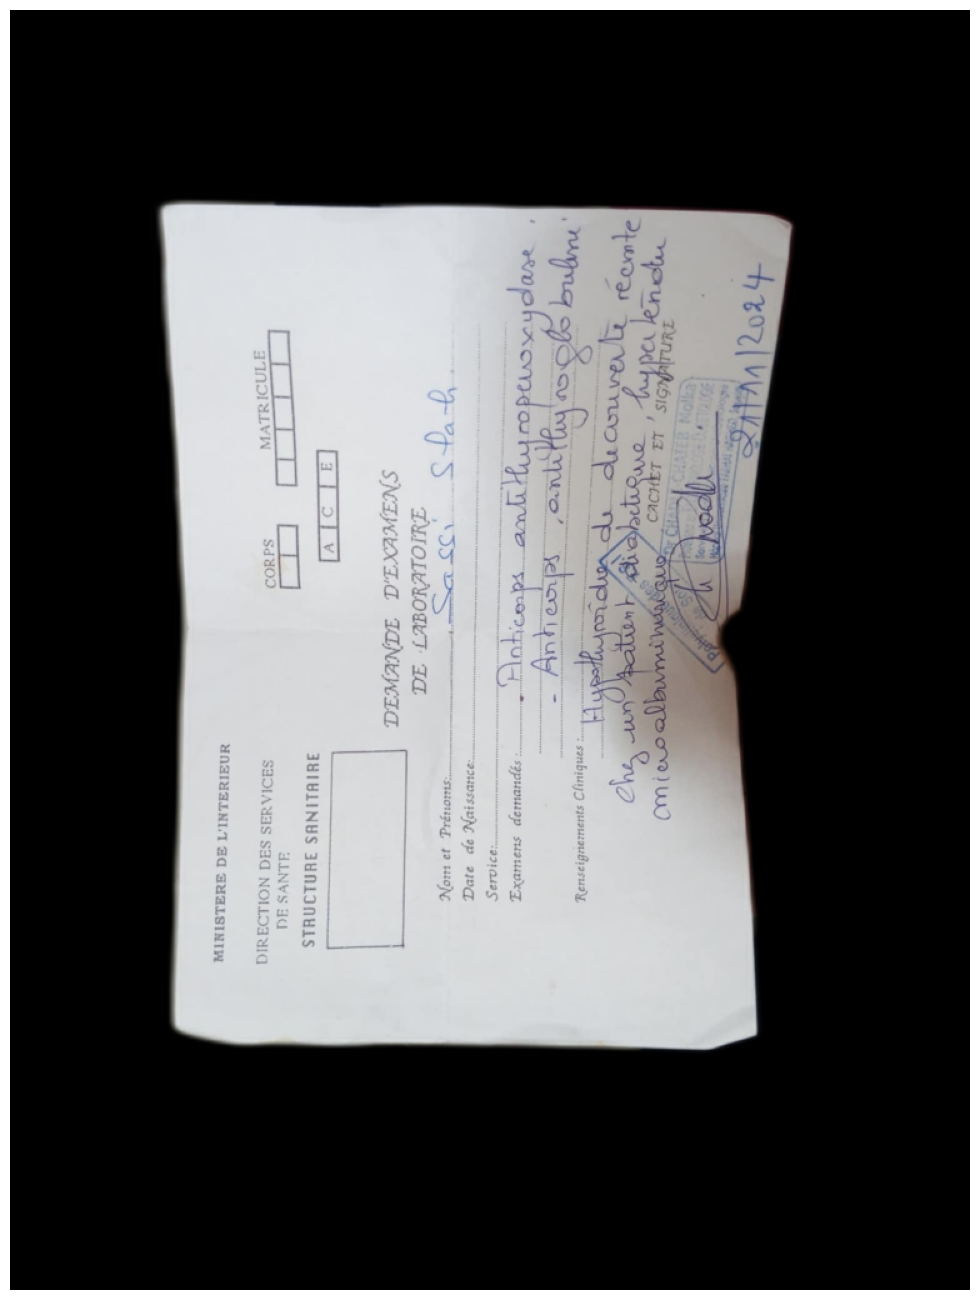

In [779]:
display("rotated_fixed.jpg")

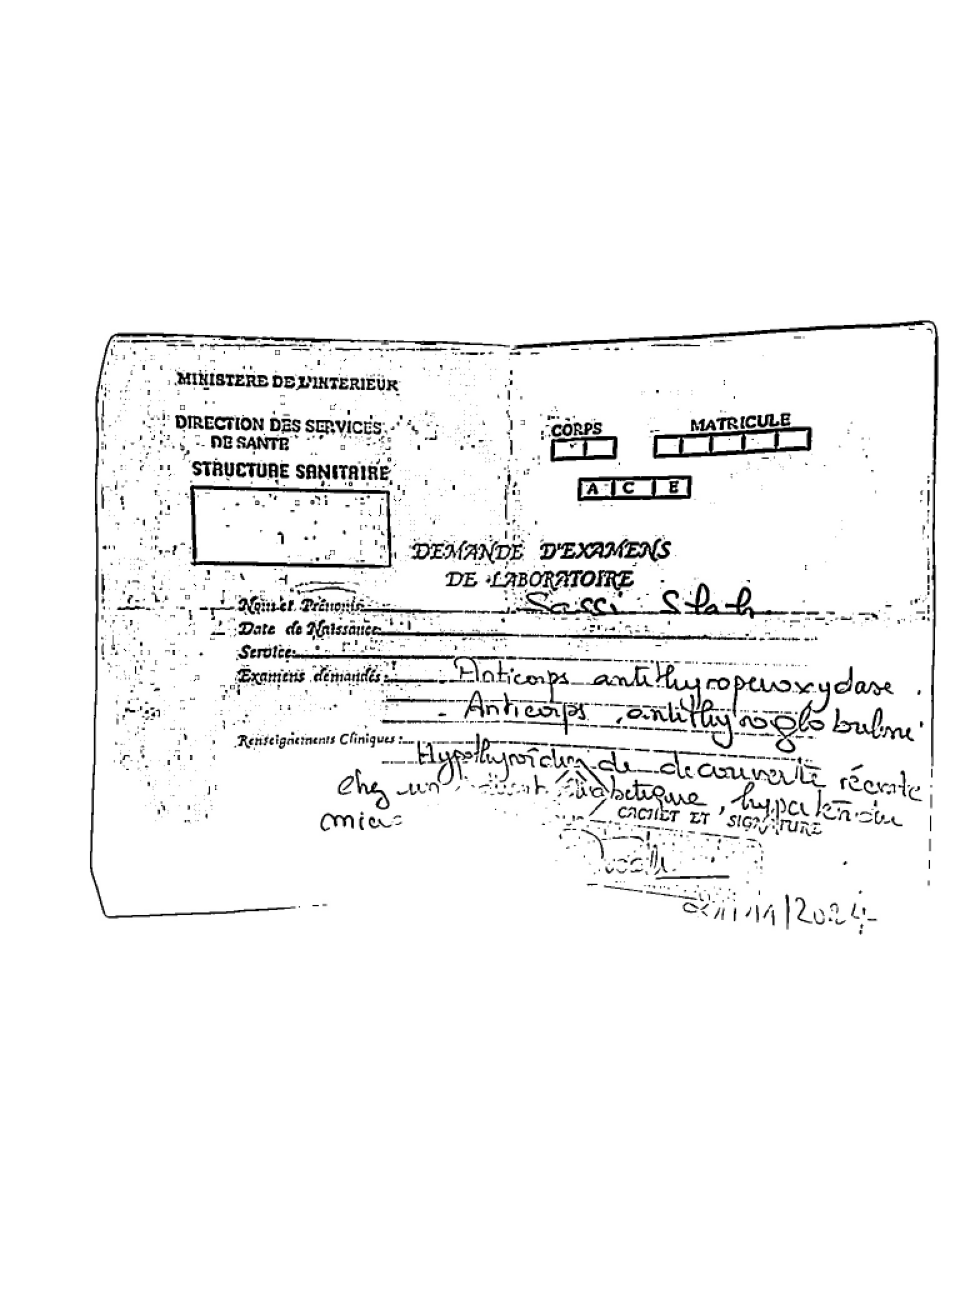

In [780]:
display("no_noise.jpg")

In [781]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

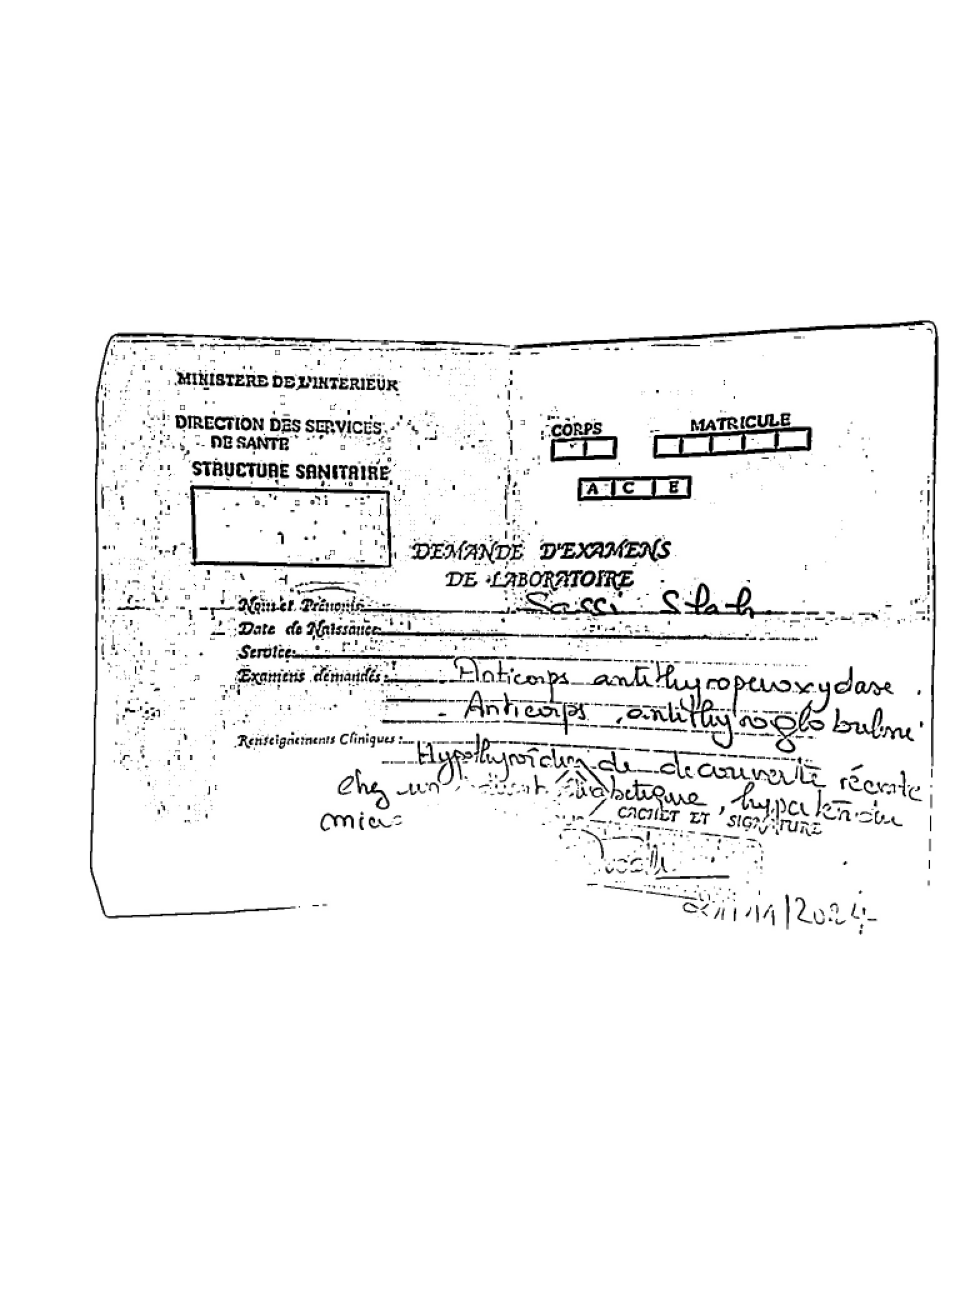

In [782]:
no_borders = remove_borders(no_noise)
cv2.imwrite("no_borders.jpg", no_borders)
display('no_borders.jpg')

In [783]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

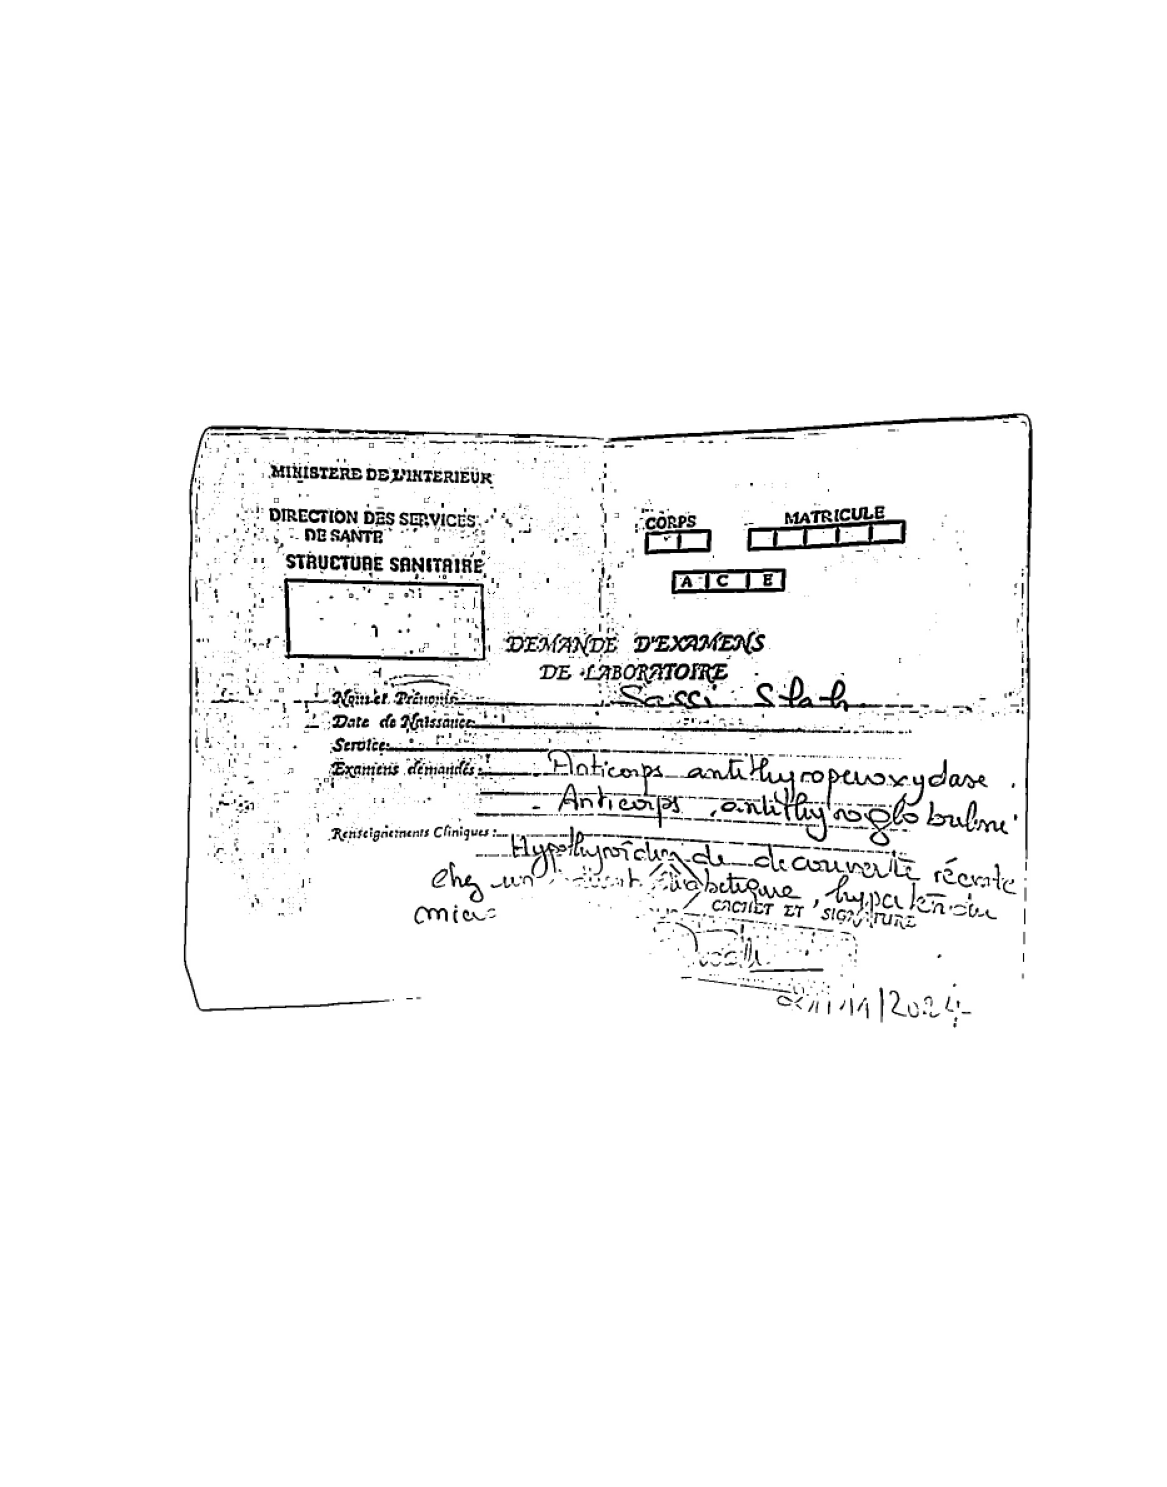

In [784]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("image_with_border.jpg", image_with_border)
display("image_with_border.jpg")

In [785]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [786]:
!pip install pytesseract


In [787]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [788]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [789]:
ocr_result = pytesseract.image_to_string(image_with_border)

In [790]:
print (ocr_result)

    

2! DEMANGE ‘DExantens
DE + ‘LABORATORRE :

 
  
   
 
  

  

roptuoscyudare .

F Ask reaps: _ Sone sy mh baler’

    
 

Faptclyx a Ay
Aen ar SE — ALA Se care e Seven le !
a BD cnet a Et ’ $16 a Raster |

~ . 1

7 |

|

 

CMiews

  

e “Sey | 4 a b

